In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

from torch.utils.data import DataLoader

In [2]:
class Discriminator(nn.Module):
  def __init__(self, input_channels, f):
    super(Discriminator, self).__init__()
    self.model = nn.Sequential(
        # refactor code if you read this
        nn.Conv2d(input_channels, f, kernel_size=4, stride=2, padding=1),
        nn.LeakyReLU(0.2),

        nn.Conv2d(f, f*2, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(f*2),
        nn.LeakyReLU(0.2),

        nn.Conv2d(f*2, f*4, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(f*4),
        nn.LeakyReLU(0.2),

        nn.Conv2d(f*4, f*8, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(f*8),
        nn.LeakyReLU(0.2),

        nn.Conv2d(f*8, f*16, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(f*16),
        nn.LeakyReLU(0.2),

        nn.Conv2d(f*16, 1, kernel_size=4, stride=2, padding=0),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.model(x)

In [3]:
class Generator(nn.Module):
  def __init__(self, noise_channels, output_channels, g):
    super(Generator, self).__init__()
    self.model = nn.Sequential(
        nn.ConvTranspose2d(noise_channels, g*32, kernel_size=4, stride=1, padding=0),
        nn.BatchNorm2d(g*32),
        nn.ReLU(),

        nn.ConvTranspose2d(g*32, g*16, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(g*16),
        nn.ReLU(),

        nn.ConvTranspose2d(g*16, g*8, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(g*8),
        nn.ReLU(),

        nn.ConvTranspose2d(g*8, g*4, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(g*4),
        nn.ReLU(),

        nn.ConvTranspose2d(g*4, g*2, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(g*2),
        nn.ReLU(),

        nn.ConvTranspose2d(g*2, output_channels, kernel_size=4, stride=2, padding=1),
        nn.Tanh()
    )

  def forward(self, x):
    return self.model(x)

In [14]:
lr = 0.0002
batch_size = 32
image_size = 128
channel_img = 1
channel_noise = 256
num_epochs = 3

d = 32
g = 32

transform = transforms.Compose([
                  transforms.Resize(image_size),
                  transforms.ToTensor(),
                  transforms.Normalize((0.5,), (0.5)),
                  ])

In [15]:
dataset = datasets.MNIST(root="dataset/", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("cuda" if torch.cuda.is_available() else "cpu")

cuda


In [16]:
discriminator = Discriminator(channel_img, d).to(device)
generator = Generator(channel_noise, channel_img, g).to(device)

optimizerD = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizerG = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))

In [17]:
discriminator.train()
generator.train()

criterion = nn.BCELoss()

real_label = 1
fake_label = 0

fixed_noise = torch.randn(64, channel_noise, 1, 1).to(device)

Starting training...
Epoch [0/10] Batch 0/1875       Loss D: 1.4027, Loss G: 2.4936


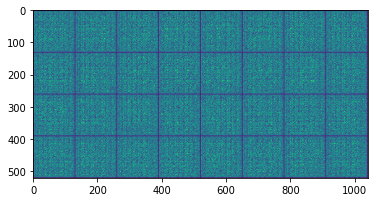

Epoch [0/10] Batch 100/1875       Loss D: 0.6879, Loss G: 2.3903


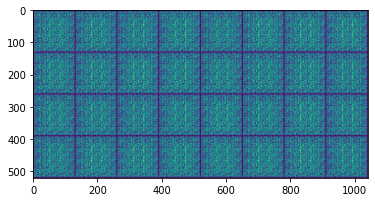

Epoch [0/10] Batch 200/1875       Loss D: 0.6542, Loss G: 2.6562


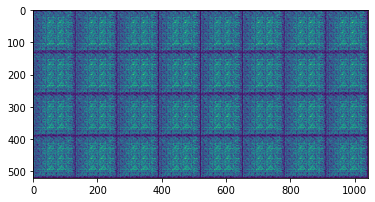

Epoch [0/10] Batch 300/1875       Loss D: 0.7669, Loss G: 2.1299


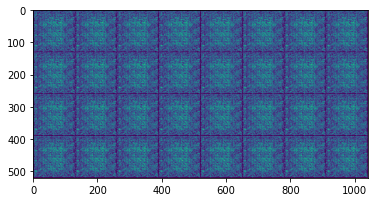

Epoch [0/10] Batch 400/1875       Loss D: 0.6722, Loss G: 2.9601


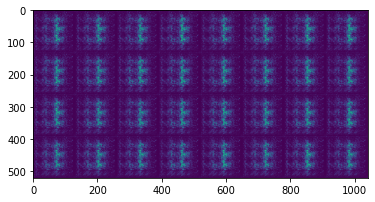

Epoch [0/10] Batch 500/1875       Loss D: 1.0419, Loss G: 2.7198


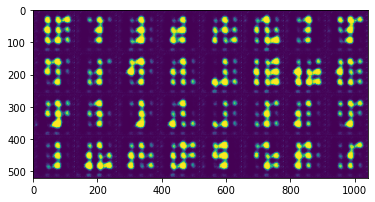

Epoch [0/10] Batch 600/1875       Loss D: 1.2383, Loss G: 1.7573


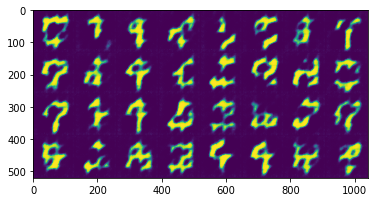

Epoch [0/10] Batch 700/1875       Loss D: 1.1528, Loss G: 1.2880


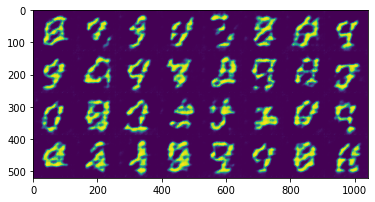

Epoch [0/10] Batch 800/1875       Loss D: 1.5197, Loss G: 0.2560


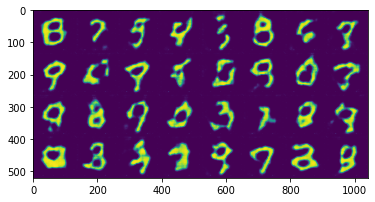

Epoch [0/10] Batch 900/1875       Loss D: 1.0200, Loss G: 0.4297


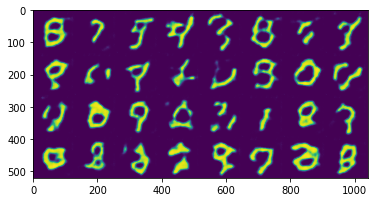

Epoch [0/10] Batch 1000/1875       Loss D: 0.9755, Loss G: 1.1905


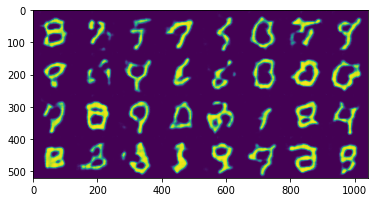

Epoch [0/10] Batch 1100/1875       Loss D: 1.4381, Loss G: 3.5959


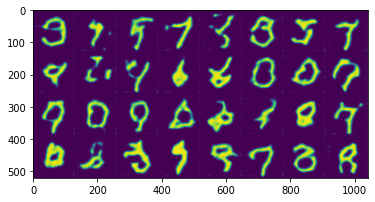

Epoch [0/10] Batch 1200/1875       Loss D: 0.8914, Loss G: 1.4680


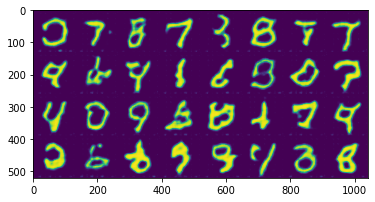

Epoch [0/10] Batch 1300/1875       Loss D: 0.9631, Loss G: 1.4021


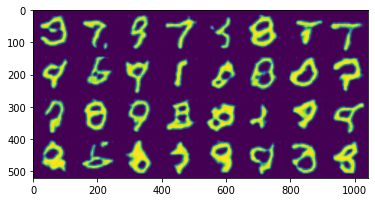

Epoch [0/10] Batch 1400/1875       Loss D: 0.6803, Loss G: 2.3225


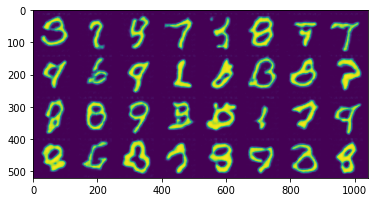

Epoch [0/10] Batch 1500/1875       Loss D: 1.2078, Loss G: 2.4189


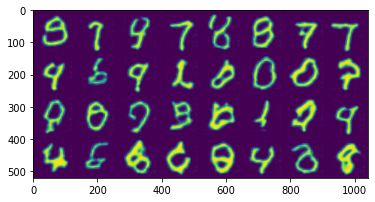

Epoch [0/10] Batch 1600/1875       Loss D: 0.8488, Loss G: 3.1587


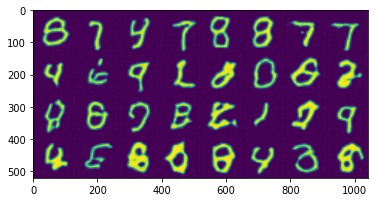

Epoch [0/10] Batch 1700/1875       Loss D: 0.8012, Loss G: 1.2293


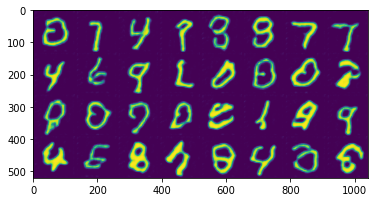

Epoch [0/10] Batch 1800/1875       Loss D: 0.9815, Loss G: 1.8382


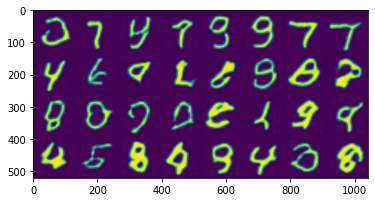

Epoch [1/10] Batch 0/1875       Loss D: 1.1832, Loss G: 1.2946


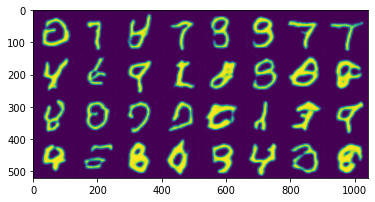

Epoch [1/10] Batch 100/1875       Loss D: 0.6978, Loss G: 2.2307


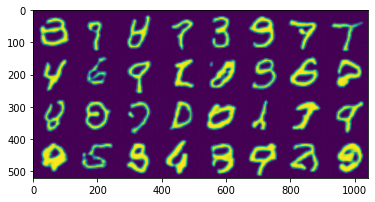

Epoch [1/10] Batch 200/1875       Loss D: 0.9122, Loss G: 2.7279


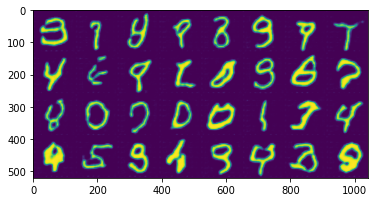

Epoch [1/10] Batch 300/1875       Loss D: 0.7860, Loss G: 2.1925


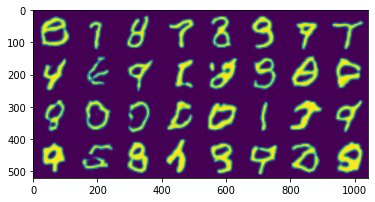

Epoch [1/10] Batch 400/1875       Loss D: 0.8681, Loss G: 2.2852


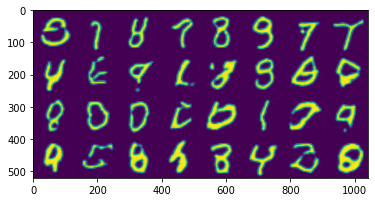

Epoch [1/10] Batch 500/1875       Loss D: 0.6747, Loss G: 2.7745


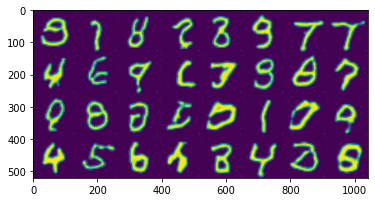

Epoch [1/10] Batch 600/1875       Loss D: 0.7762, Loss G: 1.9320


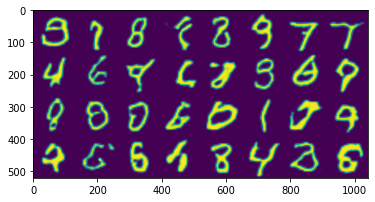

Epoch [1/10] Batch 700/1875       Loss D: 0.8034, Loss G: 1.8691


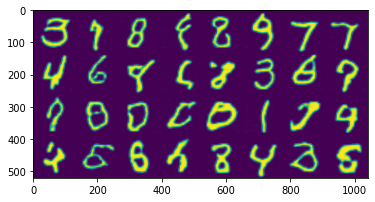

Epoch [1/10] Batch 800/1875       Loss D: 0.7189, Loss G: 2.3615


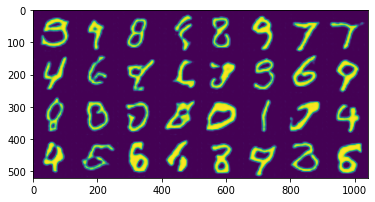

Epoch [1/10] Batch 900/1875       Loss D: 1.0697, Loss G: 3.0948


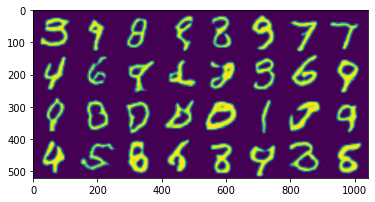

KeyboardInterrupt: ignored

In [18]:
import matplotlib.pyplot as plt

print("Starting training...")
for epoch in range(num_epochs):
  for batch_idx, (data, targets) in enumerate(dataloader):
    data = data.to(device)
    batch_size = data.shape[0]

    # train discriminator: max log(D(x)) + log(1 - D(G(z)))
    discriminator.zero_grad()

    label = (torch.ones(batch_size)*0.9).to(device)
    output = discriminator(data).reshape(-1)

    discriminator_loss_real = criterion(output, label)
    mean_discriminator_confidence = output.mean().item()

    noise = torch.randn(batch_size, channel_noise, 1, 1).to(device)
    fake = generator(noise)
    label = (torch.ones(batch_size)*0.1).to(device)

    output = discriminator(fake.detach()).reshape(-1)
    discriminator_loss_fake = criterion(output, label)

    loss_discriminator = discriminator_loss_real + discriminator_loss_fake
    loss_discriminator.backward()
    optimizerD.step()

    # train generator: max log(D(G(z)))
    generator.zero_grad()

    label = torch.ones(batch_size).to(device)
    output = discriminator(fake).reshape(-1)

    loss_generator = criterion(output, label)
    loss_generator.backward()
    optimizerG.step()

    if batch_idx % 100 == 0:
      print(f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(dataloader)} \
      Loss D: {loss_discriminator:.4f}, Loss G: {loss_generator:.4f}")

      with torch.no_grad():
        fake = generator(fixed_noise)
        img_grid_real = torchvision.utils.make_grid(data[:32], normalize=True)
        img_grid_fake = torchvision.utils.make_grid(fake[:32], normalize=True)

        plt.imshow(img_grid_fake[0].cpu().data.numpy())
        plt.show()

In [19]:
# Epoch [1/10] Batch 900/1875       Loss D: 1.0697, Loss G: 3.0948